# **Suport Vector Machines (SVM)**

- SVM is a supervised learning algorithm used for both classification and regression tasks. It works by finding the optimal (maximum) hyperplane that separates different classes in a dataset.

- In other words, we want to make sure that as many points in one class are in one side of the hyperplane and as many points in the other class are on the other side.

Key concepts:

- **Hyperplane**: A decision boundary that separates two classes.
- **Support Vectors**: Data points that lie closest to the hyperplane and influence its position and orientation.
- **Margin**: The distance between the hyperplane and the nearest support vectors.
- **Kernel trick**: Allows SVM to work in high-dimensional space by mapping data to a higher dimension.

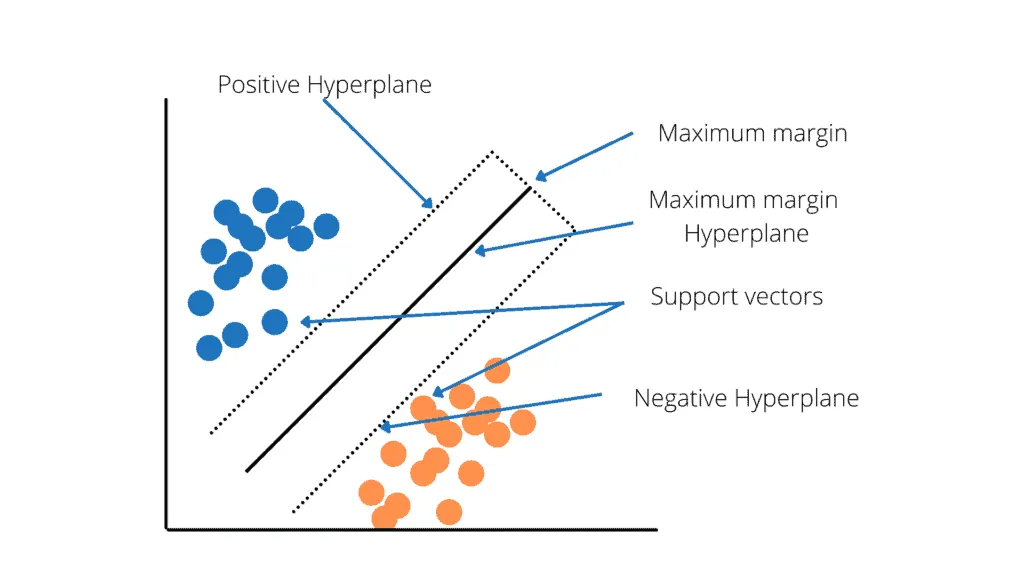



# **Implementation using important Python libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

- Generation of a synthetic binary classification dataset using **sklearn**

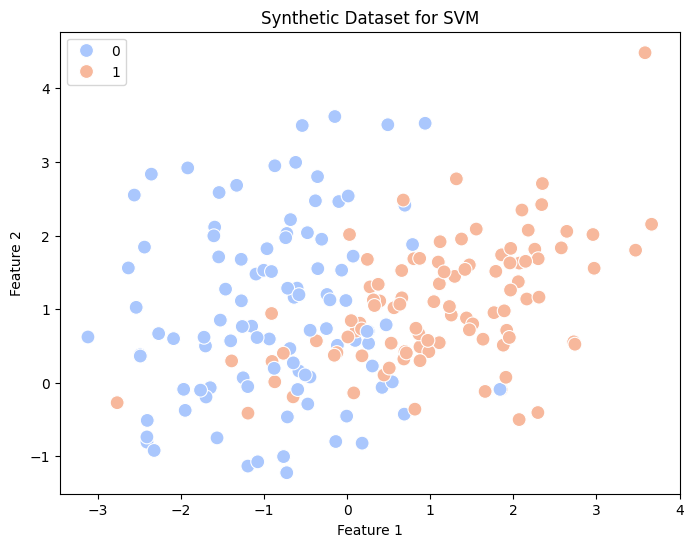

In [13]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", s=100)
plt.title("Synthetic Dataset for SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

- Train the SVM classifier using **SVC** from **sklearn.svm**

- Parameter 'C' is a regularization parameter:
  - High C -> less regularization, allows more misclassification but maximizes margin
  - Low C -> more regularization, minimizes misclassification but may have smaller margin

- When using kernel='rbf', the parameter gamma:
  - With a high value -> models complex patterns but may overfit
  - With a low value -> more generalized decision boundary

- Other types of kernels:
  - Linear kernel -> kernel='linear'
  - Polynomial kernel -> kernel='polynomial'
  - Sigmoid kernel -> kernel='sigmoid'

  More info here -> https://scikit-learn.org/stable/api/sklearn.svm.html

In [35]:
svm_model = SVC(kernel='rbf', C=0.5, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.83      0.88        23
           1       0.80      0.94      0.86        17

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.89      0.88      0.88        40



- Visualization of the decision boundary (hyperplane)

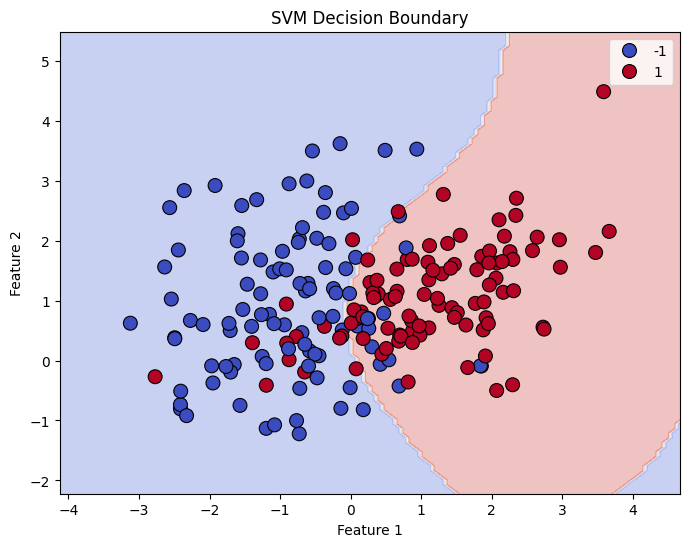

In [36]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", s=100, edgecolor='k')
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm_model, X, y)

# **Implementation from scratch**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

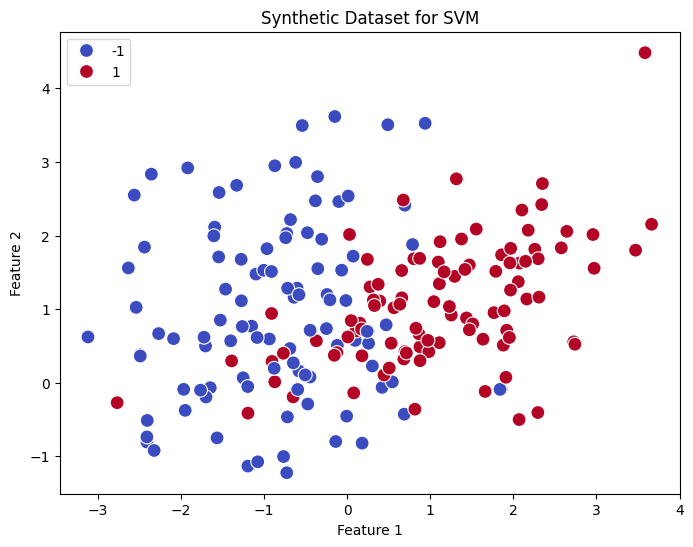

In [38]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

y = np.where(y == 0, -1, 1) # for Hinge loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", s=100)
plt.title("Synthetic Dataset for SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

- Implementation of SVM that uses Hinge loss and updates weights with Gradient Descent.

In [39]:
class SVM:
    def __init__(self, learning_rate=0.00001, lambda_param=0.01, epochs=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                condition = y[i] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[i]))
                    self.b -= self.lr * y[i]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)


- Trainig the model

In [40]:
svm = SVM(learning_rate=0.00001, lambda_param=0.01, epochs=1000)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


- Visualization of the decision boundary (hyperplane)

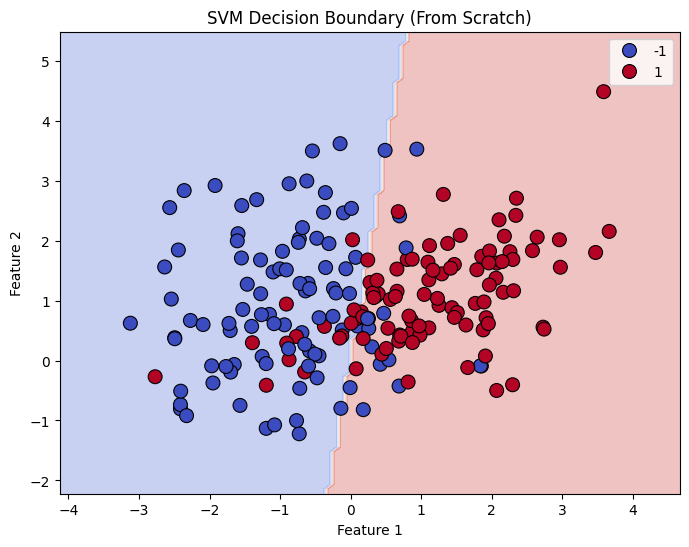

In [41]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", s=100, edgecolor='k')
    plt.title("SVM Decision Boundary (From Scratch)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm, X, y)